# CNNs for Text Sentiment Classification
Aside from RNNs, 1D convnets are a cheaper alternative to pattern recognition on sequence data. We will be using 1D convnets to process IMDB reviews for sentiment classification.

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models, layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
import tensorflow as tf

tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
# Import & Preprocess data
max_features = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

# Pad sequence data
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

25000 train sequences
25000 test sequences
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [20]:
# Train 1D convnet model
model = models.Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 32)          28704     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          7200      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [21]:
from keras import callbacks

model.compile(
    optimizer=RMSprop(1e-4),
    loss='binary_crossentropy',
    metrics=['acc']
)

es = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5, 
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=[es]
)

D:\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 3s 175us/step - loss: 0.6924 - acc: 0.5257 - val_loss: 0.6912 - val_acc: 0.5682
Epoch 2/20
20000/20000 [==============================] - 3s 160us/step - loss: 0.6851 - acc: 0.6518 - val_loss: 0.6863 - val_acc: 0.6582
Epoch 3/20
20000/20000 [==============================] - 3s 167us/step - loss: 0.6728 - acc: 0.7564 - val_loss: 0.6685 - val_acc: 0.7334
Epoch 4/20
20000/20000 [==============================] - 3s 160us/step - loss: 0.6357 - acc: 0.7918 - val_loss: 0.6048 - val_acc: 0.7578
Epoch 5/20
20000/20000 [==============================] - 3s 163us/step - loss: 0.5374 - acc: 0.8180 - val_loss: 0.4826 - val_acc: 0.8170
Epoch 6/20
20000/20000 [==============================] - 3s 171us/step - loss: 0.4156 - acc: 0.8480 - val_loss: 0.3915 - val_acc: 0.8408
Epoch 7/20
20000/20000 [==============================] - 3s 159us/step - loss: 0.3357 - acc: 0.8690 - val_loss: 0.3514 - v

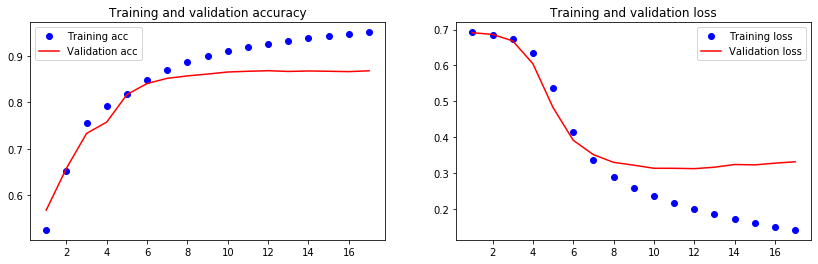

In [22]:
# Plot results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

f, ax = plt.subplots(1,2, figsize=(14,4))

ax[0].plot(epochs, acc, 'bo', label='Training acc')
ax[0].plot(epochs, val_acc, 'r', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

ax[1].plot(epochs, loss, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()

plt.show()

In [24]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('cross-entropy test loss: ', test_loss)
print('test accuracy: ', test_acc)

25000/25000 [==============================] - 3s 135us/step
cross-entropy test loss:  0.32439740394592287
test accuracy:  0.8623600006103516
